# Revolut Home Task

This notebook contains data formatting in Python and embedded Tableau generated charts. It contains analysis of Revolut KYC data executed by Veritas API


In [75]:
import numpy as np 
import pandas as pnd
import scipy as sp 
import matplotlib.pyplot as plt #data visualisation
from matplotlib.pyplot import pie, axis, show
import seaborn as sb
import json
import ast
import sys

### Load and Format Data

In [52]:
docrep=pnd.read_csv("C:\Revolut_Challenge_Prakhyath\doc_reports_sample.csv")

In [5]:
facerep=pnd.read_csv("C:\Revolut_Challenge_Prakhyath\\face_reports_sample.csv")

In [6]:
docrep.head()

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,27241,8190909e566647a5b6afeee9b4ec6c6a,clear,clear,clear,clear,clear,2017-05-25 08:38:56,clear,NaN,NaN,clear,NaN,clear,30e11e95e30748f485a2271ca5e6abb8,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
1,28369,6b62136dfde348a99855e350294aaf5d,clear,clear,clear,clear,clear,2017-05-31 08:12:51,clear,NaN,NaN,clear,NaN,clear,4c0bfde8eb2249ed820e1f61d3ec3e33,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",clear
2,27988,73679363dccc46fa9f34a4fefd0d76e3,clear,clear,clear,clear,clear,2017-05-29 15:07:04,clear,NaN,NaN,clear,clear,clear,c5004fd1fc1d4e36a11433b70d960867,clear,NaN,"{'gender': 'Male', 'nationality': 'GBR', 'docu...",clear
3,27529,07857065dfa64db386739ec4fff47856,consider,clear,clear,clear,clear,2017-05-26 19:00:35,clear,NaN,NaN,clear,clear,consider,e4b26d4ddda545c9931a0a845cd65109,clear,NaN,"{'gender': 'Male', 'nationality': 'PER', 'docu...",caution
4,47987,9f887805b2af49069349ff107e0bca01,clear,clear,clear,clear,clear,2017-05-29 14:38:21,clear,NaN,NaN,clear,clear,clear,8ead2b23ef664e4d85fae798a7d5d52c,clear,NaN,"{'gender': 'Male', 'issuing_date': '2011-03', ...",clear


In [8]:
facerep.head()

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,58,ecee468d4a124a8eafeec61271cd0da1,clear,clear,2017-06-20 17:50:43,clear,clear,{},9e4277fc1ddf4a059da3dd2db35f6c76
1,76,1895d2b1782740bb8503b9bf3edf1ead,clear,clear,2017-06-20 13:28:00,clear,clear,{},ab259d3cb33b4711b0a5174e4de1d72c
2,217,e71b27ea145249878b10f5b3f1fb4317,clear,clear,2017-06-18 21:18:31,clear,clear,{},2b7f1c6f3fc5416286d9f1c97b15e8f9
3,221,f512dc74bd1b4c109d9bd2981518a9f8,clear,clear,2017-06-18 22:17:29,clear,clear,{},ab5989375b514968b2ff2b21095ed1ef
4,251,0685c7945d1349b7a954e1a0869bae4b,clear,clear,2017-06-18 19:54:21,clear,clear,{},dd1b0b2dbe234f4cb747cc054de2fdd3


In [9]:
propdf=docrep[['user_id','attempt_id','properties']]

In [10]:
propdfnew = pnd.DataFrame()
for index, row in propdf.iterrows():
    #print(type(row['properties']))
    dict=ast.literal_eval(row['properties'])
    #print(type(dict))
    #print(dict)
    for key in dict:
       # type(dict[key])
       propdfnew.at[index,'attempt_id']=row['attempt_id']
       propdfnew.at[index,'user_id']=row['user_id']
       propdfnew.at[index,key]=dict[key]
            
            

In [15]:
docrep = pnd.merge(docrep, propdfnew, on='attempt_id')

In [14]:
propdfnew.head()

,attempt_id,user_id,gender,document_type,date_of_expiry,issuing_country,nationality,issuing_date,issuing_state,document_version
0,30e11e95e30748f485a2271ca5e6abb8,8190909e566647a5b6afeee9b4ec6c6a,Female,driving_licence,2023-12-05,GBR,NaN,NaN,NaN,NaN
1,4c0bfde8eb2249ed820e1f61d3ec3e33,6b62136dfde348a99855e350294aaf5d,Male,driving_licence,2020-05-13,GBR,NaN,NaN,NaN,NaN
2,c5004fd1fc1d4e36a11433b70d960867,73679363dccc46fa9f34a4fefd0d76e3,Male,passport,2023-11-15,GBR,GBR,NaN,NaN,NaN
3,e4b26d4ddda545c9931a0a845cd65109,07857065dfa64db386739ec4fff47856,Male,passport,2021-01-27,PER,PER,NaN,NaN,NaN
4,8ead2b23ef664e4d85fae798a7d5d52c,9f887805b2af49069349ff107e0bca01,Male,national_identity_card,NaN,FRA,NaN,2011-03,NaN,NaN


In [16]:
docrep.shape

(4991, 28)

In [22]:
for index, row in propdf.iterrows():
    print(index)
    print(propdf.loc[index,'attempt_id'])
    break;

0
30e11e95e30748f485a2271ca5e6abb8


In [36]:
docrep.to_csv(r'C:\Revolut_Challenge_Prakhyath\document_report_reformat.csv', index = False)

### Exploratory Data Analysis

#### Document Report

Document report has seen a significant upswing in the number of failures

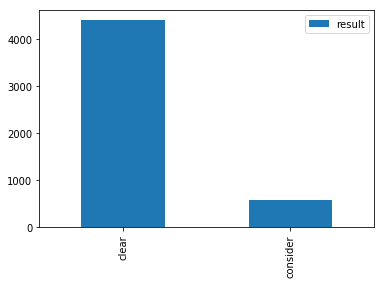

In [45]:
docrep['result'].value_counts().plot(kind='bar',stacked=True,legend=True)
#df = pnd.DataFrame(docrep['result'].value_counts(), index=docrep.index)
#ax = df.plot.bar(rot=0)
#docrep['result'].apply(pnd.value_counts).plot.pie(subplots=True)


Note that the system is still working for the majority of cases. <br>

A consistent upward trend for fails (value=consider) has developed since June and this rate has further increased slightly in September. There is nothing obvious in the change log of the API that would correspond to this increase
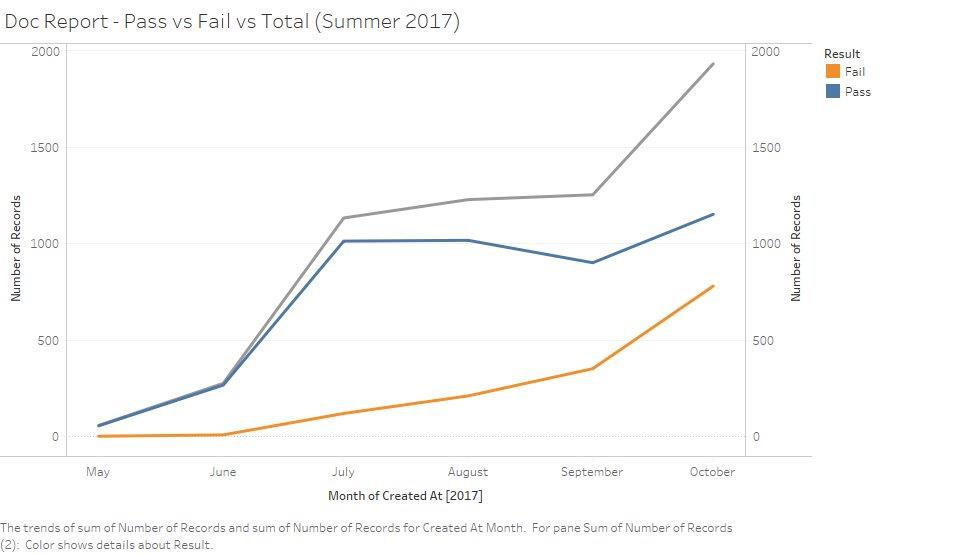

In [27]:
#docrep['created_at'] = docrep['created_at'].astype('datetime64')
#docrep['visual_authenticity_result'] = docrep['visual_authenticity_result'].astype('category')
#docrep['result'] = docrep['result'].astype('category')
#docrep['image_integrity_result']=docrep['image_integrity_result'].astype('category')
#docrep['face_detection_result']=docrep['face_detection_result'].astype('category')
#docrep['image_quality_result']=docrep['image_quality_result'].astype('category')
#docrep.dtypes

In [19]:
docrep['created_month']=pnd.DatetimeIndex(docrep['created_at']).month

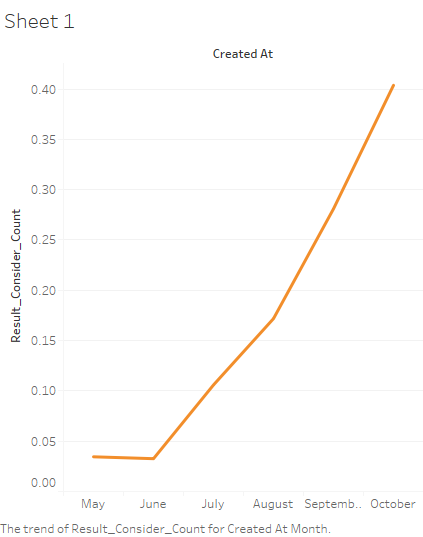
__Trend of Failed Document Checks (based on Result) as percent of total__ <br>

Breaking down the occurences of 'consider', there is a large increase in the rate of fails in June which increases even further in September. This needs further investigation

Investigating sources of these increases in failures by checking trends of subresults, we can see two highly correlated sub results - __ImageQualityResult__ and __ImageIntegrityResult__

__Result vs ImageIntegrityResult = consider__
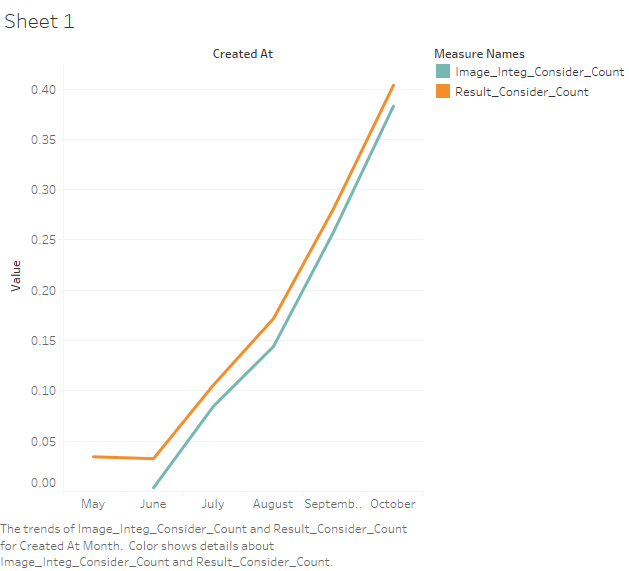
__Result vs ImageQualityResult = unidentified__ 
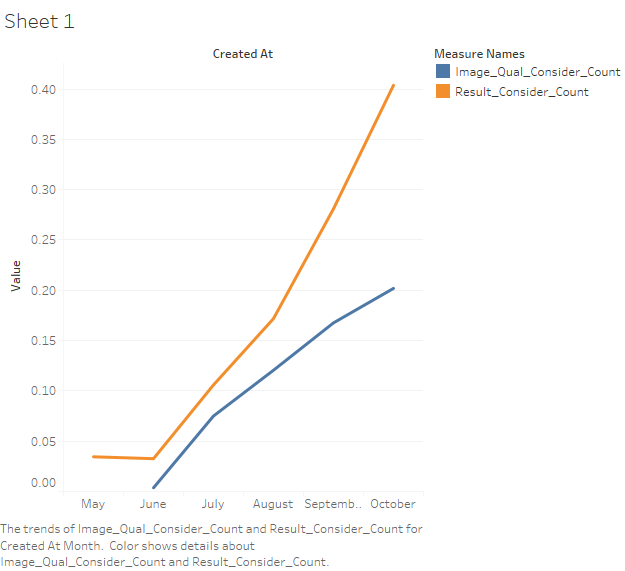

In [47]:
integr_inv=docrep['image_integrity_result']=='consider'
integr_cons=docrep[integr_inv]

In [48]:
integr_cons.shape

(448, 29)

Drilling down into the Image Integrity fails - we see that there is no outlier document type that is generating these fails. although they are all on an upwards trajectory with passports showing significant uptrend in quality fails

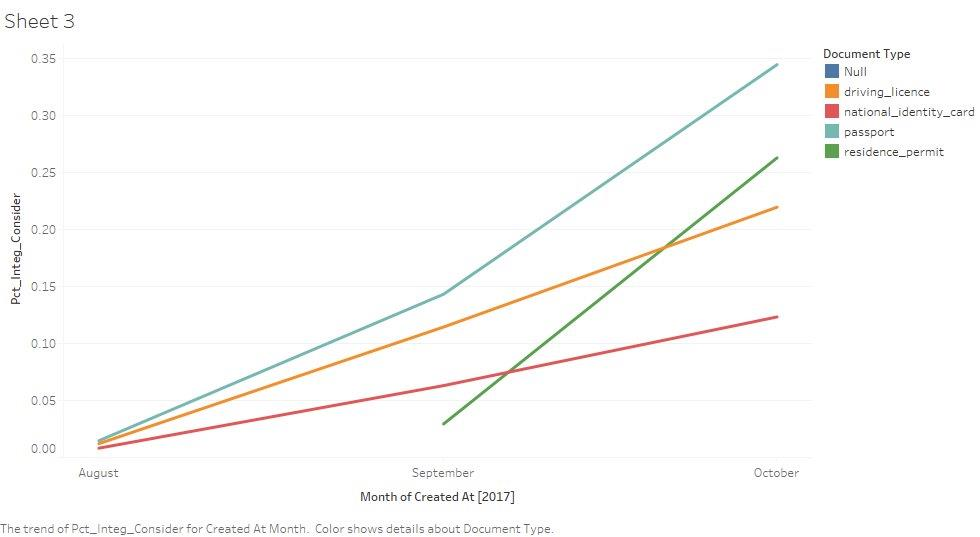

Another source of fails seems to be the sub result = caution - which is vaguely defined as "if any underlying verification have failed". Further granularity to this data point will provide more insight into the source of these fails. "caution" does not seem to be specific to any particular document
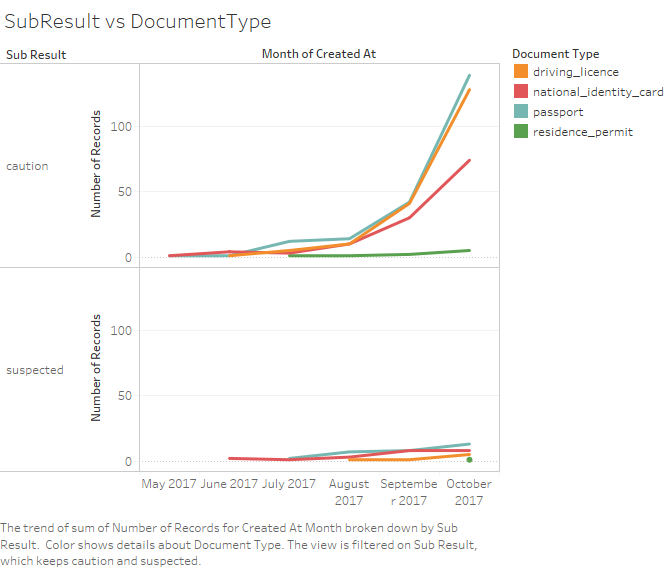

There is no geographical information about the Image Quality check fails as there is no associated properties information. The global dispersion of image quality via image integrity check has no outlier country
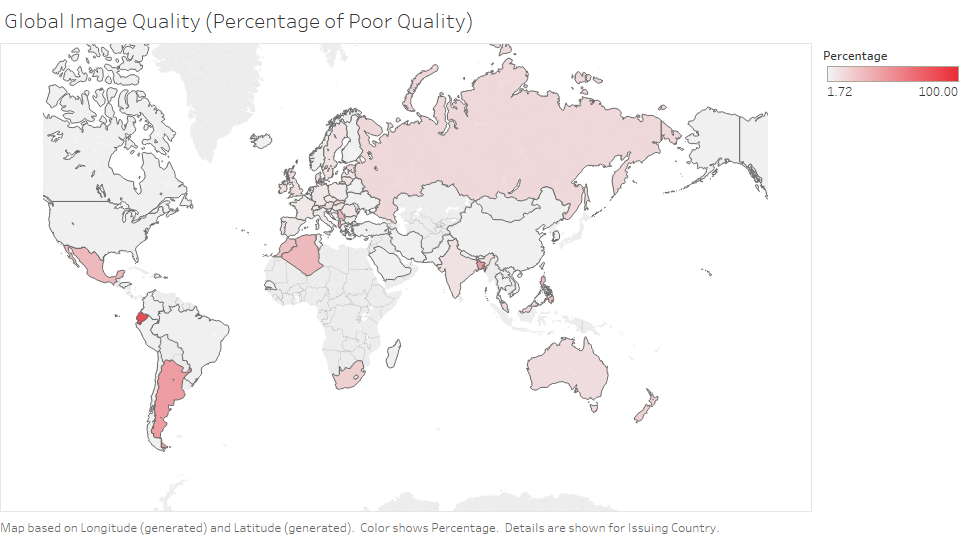

There is a correlation between conclusive document_quality result and subresult with both lending to fails in image_integrity_result. This increase in fails starts markedly in August 
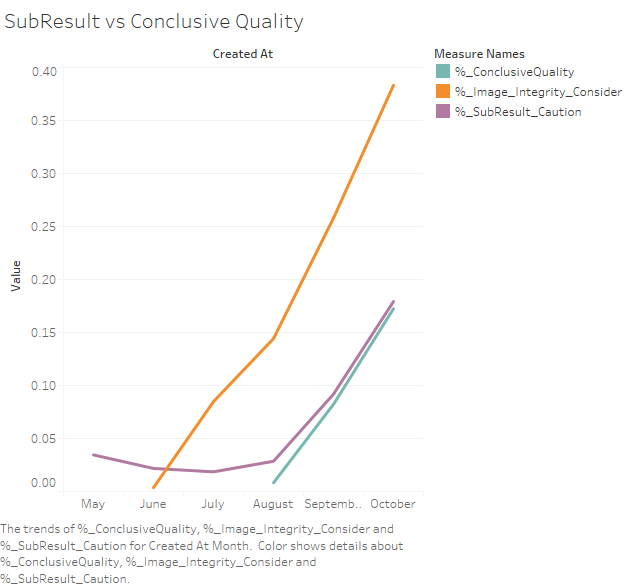

#### Face Report

The overall fails on the Facial Similarity report seem to be on a down trend <br>

__Fails as a percentage total attempts per month__
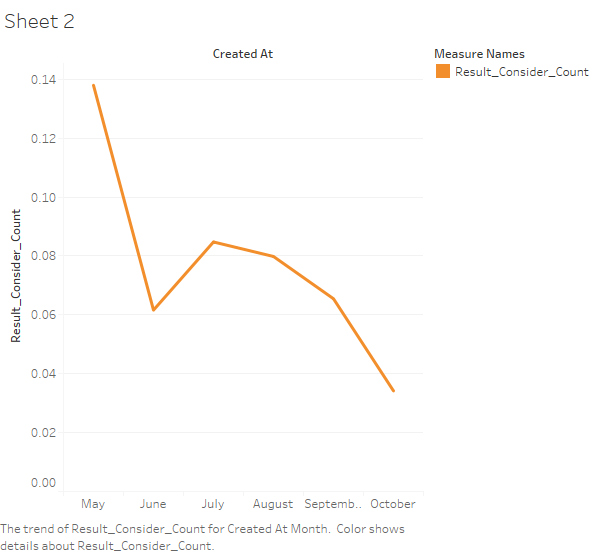


The shape of the trend is mainly defined by a drop in bad quality images (as defined by Image Integrity Result)
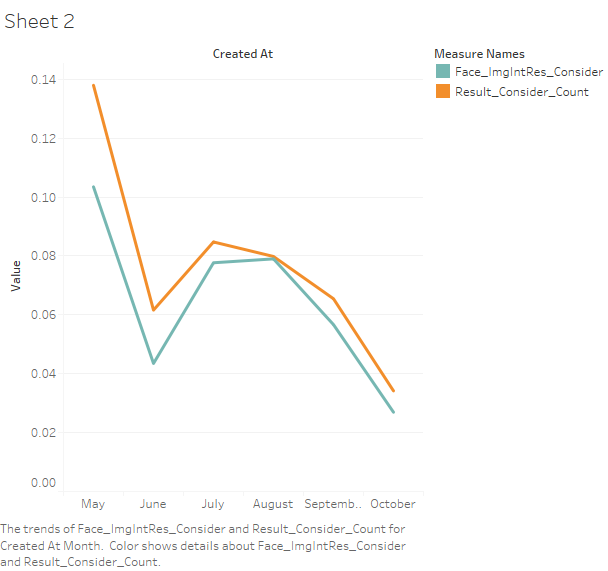

### Causes

The other sub results had little to no correlation with the increase in failures of document checks (see Tableau results). So it is safe to assume that the source of the failures may lie with Image Quality and Image Integrity checks. 

Based on the veriatas description of these attributes, the failures seem to stem from 

1. the quality of the images submitted
2. the capability of OCR in recognizing the document (56.6% of fails are due to this)

### Solution

__Document Report__

- Image Integrity Result - the quality of images is one of the bigger factors in the increase in failed attempts. To resolve this, we either 
    - Specify concrete and specific instructions for each document type to users to increase the overall quality of images taken of each document type
    - Consult Veritas on employing further machine learning capabilities where possible to either improve recognition or compensate by enhancing or optimising quality
    - Where sub result value is caution, Vertias should provide further breakdown of underlying verifications as this seems to have a high correlation with conclusive document quality check - which lends to image integrity check
    
- Image Quality Result 
    - Provide properties data for the failed OCR checks to fully understand the demographic of failed documents
    - Build a layer before OCR to optimise quality through image processing (with nueral networks for example)
    - Resolving this would result in a decrease of 56.60% in fails


It is important to note that the system works well in general

In [73]:
#docrep['image_quality_result'].value_counts()
dffail=docrep[docrep.result == 'consider']
x=dffail.loc[dffail.image_quality_result == 'unidentified', 'image_quality_result'].count()/dffail['image_quality_result'].count()
print (x*100)
#dffail.shape

56.580732700135684


In [76]:
sys.path

['',
 'C:\\Users\\murfe\\Anaconda3\\python36.zip',
 'C:\\Users\\murfe\\Anaconda3\\DLLs',
 'C:\\Users\\murfe\\Anaconda3\\lib',
 'C:\\Users\\murfe\\Anaconda3',
 'C:\\Users\\murfe\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\murfe\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\murfe\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\murfe\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\murfe\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\murfe\\.ipython']